### WHY RFM ?

To build an effective Customer Relationship Management (CRM) strategy, companies need to understand how each customer interacts with their business. This requires answering three key questions:

> **Recency – When was the customer’s most recent purchase?**

> **Frequency – How often does the customer make purchases?**

> **Monetary – How much has the customer spent?**

By analyzing these factors, customers can be grouped into meaningful segments, reducing thousands of individual profiles into a more manageable set of categories. This process is known as RFM analysis, where RFM stands for Recency, Frequency, and Monetary. To segment customers effectively, businesses first calculate these RFM metrics and then assign each customer an RFM score.

In [315]:
import numpy as np
import pandas as pd
import datetime as dt

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [316]:
import pandas as pd

# Read with correct encoding
df_2009_2010 = pd.read_excel("online_retail_II.xlsx", 
                    sheet_name="Year 2009-2010") 

df_2010_2011 = pd.read_excel("online_retail_II.xlsx", 
                    sheet_name="Year 2010-2011") 

# Add a column to distinguish rfms
df_2009_2010["Year"] = "2009-2010"
df_2010_2011["Year"] = "2010-2011"

# Merge them
df_all = pd.concat([df_2009_2010, df_2010_2011], ignore_index=True)

df_all = df_all

In [317]:
df = df_all.copy()
# Quick check
print(df.shape)   # number of rows/cols
df.head()

(1067371, 9)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom,2009-2010
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,2009-2010
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,2009-2010
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom,2009-2010
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom,2009-2010


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
 8   Year         1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 73.3+ MB


## Understanding the Dataset Variables

- **InvoiceNo**: A unique identifier for each transaction. Invoices that represent refunds include the letter "C".  
- **StockCode**: A distinct code assigned to each product.  
- **Description**: The name or label of the product.  
- **Quantity**: The number of units of a product in a single transaction.  
- **InvoiceDate**: The exact date and time when the transaction occurred.  
- **UnitPrice**: The price of one unit of the product, recorded in Sterling (£).  
- **CustomerID**: A unique identifier assigned to each customer.  
- **Country**: The country of residence of the customer.


### Exploring Dataset

In [319]:
# Find all duplicate rows
duplicates = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicates.shape[0]}")
duplicates.head()


Number of duplicate rows: 12133


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75000,16329.00000,United Kingdom,2009-2010
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85000,16329.00000,United Kingdom,2009-2010
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65000,16329.00000,United Kingdom,2009-2010
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75000,16329.00000,United Kingdom,2009-2010
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75000,16329.00000,United Kingdom,2009-2010


In [320]:
# Remove duplicates

print("Before:", df.shape)
df = df.drop_duplicates()
print("After:", df.shape)

Before: (1067371, 9)
After: (1055238, 9)


#### Number of Countries

In [321]:
df['Country'].nunique()

43

#### Name of Countries and their total count

In [322]:
df['Country'].value_counts()

Country
United Kingdom          969347
EIRE                     17844
Germany                  17600
France                   14296
Netherlands               5139
Spain                     3799
Switzerland               3181
Belgium                   3122
Portugal                  2608
Australia                 1912
Channel Islands           1663
Italy                     1532
Norway                    1455
Sweden                    1362
Cyprus                    1157
Finland                   1049
Austria                    938
Denmark                    817
Unspecified                752
Greece                     663
Japan                      582
Poland                     535
USA                        535
United Arab Emirates       500
Israel                     368
Hong Kong                  360
Singapore                  346
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        169


#### Number of Unique Products

In [323]:
df['Description'].nunique()

5698

#### Most Purchased items

In [324]:
df.groupby("Description").agg({"Quantity": lambda x: x.sum()}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,108305
WHITE HANGING HEART T-LIGHT HOLDER,92930
ASSORTED COLOUR BIRD ORNAMENT,81087
JUMBO BAG RED RETROSPOT,77928
BROCADE RING PURSE,70664


#### check the number of uniques for StockCode ve Description variables:

In [325]:
print(f"Number of uniques in StockCode: {df['StockCode'].nunique()}")
print(f"Number of uniques in Description:{df['Description'].nunique()}")

Number of uniques in StockCode: 5305
Number of uniques in Description:5698


Since the values should normally match, the presence of more than one unique value in the Description field for a single StockCode suggests inconsistency. To investigate, we’ll examine each StockCode along with its corresponding Description values and collect all StockCodes that have multiple unique Descriptions into a list (output hidden due to the large number of rows).

In [326]:
temp_df_a =df.groupby('StockCode').agg({'Description': "nunique"})
temp_df_a.reset_index(inplace=True)
temp_df_a.head()
temp_df_b = list(temp_df_a.loc[temp_df_a['Description'] > 1, 'StockCode'])   

for stock_code in temp_df_b[0:5]:
    print(f"Stock Code = {stock_code} {df.loc[df['StockCode'] == stock_code, 'Description'].unique()}")

Stock Code = 10080 ['GROOVY CACTUS INFLATABLE' nan 'check']
Stock Code = 10120 ['DOGGY RUBBER' 'Zebra invcing error']
Stock Code = 10133 ['COLOURING PENCILS BROWN TUBE' 'damaged']
Stock Code = 16008 ['SMALL FOLDING SCISSOR(POINTED EDGE)' 'check']
Stock Code = 16011 [' ANIMAL STICKERS' 'ANIMAL STICKERS']


For instance, in the list above, both descriptions 'VIPPASSPORT COVER ' and 'VIP PASSPORT COVER ' share the same StockCode 20622. This indicates duplication in the Description field (likely caused by manual entry or data merging), suggesting that StockCode is a more reliable identifier to use.



In [327]:
df.loc[df['StockCode'] == 20622, 'Description'].unique() 

array(['VIPPASSPORT COVER ', 'VIP PASSPORT COVER '], dtype=object)

 #### Dropping NA Values

In [328]:
df.dropna(inplace=True)

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 812368 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      812368 non-null  object        
 1   StockCode    812368 non-null  object        
 2   Description  812368 non-null  object        
 3   Quantity     812368 non-null  int64         
 4   InvoiceDate  812368 non-null  datetime64[ns]
 5   Price        812368 non-null  float64       
 6   Customer ID  812368 non-null  float64       
 7   Country      812368 non-null  object        
 8   Year         812368 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 62.0+ MB


In [330]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,812368.00000,812368,812368.00000,812368.00000
mean,12.55766,2011-01-02 01:21:27.645033728,3.69368,15317.79657
min,-80995.00000,2009-12-01 07:45:00,0.00000,12346.00000
25%,2.00000,2010-07-06 12:19:00,1.25000,13969.00000
50%,5.00000,2010-12-03 17:20:00,1.95000,15245.00000
75%,12.00000,2011-07-27 15:14:00,3.75000,16794.00000
max,80995.00000,2011-12-09 12:50:00,38970.00000,18287.00000
std,190.34824,NaN,70.75738,1698.11349


In [331]:
df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max,std
Quantity,812368.00000,12.55766,-80995.00000,-2.00000,1.00000,1.00000,2.00000,5.00000,12.00000,24.00000,36.00000,128.00000,80995.00000,190.34824
InvoiceDate,812368,2011-01-02 01:21:27.645033728,2009-12-01 07:45:00,2009-12-04 14:14:00,2010-01-18 11:21:00,2010-03-04 12:13:00,2010-07-06 12:19:00,2010-12-03 17:20:00,2011-07-27 15:14:00,2011-11-01 11:29:00,2011-11-20 14:01:00,2011-12-05 17:17:00,2011-12-09 12:50:00,NaN
Price,812368.00000,3.69368,0.00000,0.29000,0.42000,0.55000,1.25000,1.95000,3.75000,6.75000,8.50000,14.95000,38970.00000,70.75738
Customer ID,812368.00000,15317.79657,12346.00000,12420.00000,12681.00000,12970.00000,13969.00000,15245.00000,16794.00000,17706.00000,17907.00000,18210.00000,18287.00000,1698.11349


The Quantity column contains negative values, which occur due to refund transactions (invoices marked with the letter "C"). To address this, we reassign df after filtering out all refund invoices.

In [332]:
df_stock_refunded = df[df["Invoice"].astype(str).str.contains("C", na=False)]


In [333]:
df_stock_refunded.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95000,16321.00000,Australia,2009-2010
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65000,16321.00000,Australia,2009-2010
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25000,16321.00000,Australia,2009-2010
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10000,16321.00000,Australia,2009-2010
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95000,16321.00000,Australia,2009-2010


In [334]:
df = df[~df["Invoice"].astype(str).str.contains("C", na=False)]

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793680 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      793680 non-null  object        
 1   StockCode    793680 non-null  object        
 2   Description  793680 non-null  object        
 3   Quantity     793680 non-null  int64         
 4   InvoiceDate  793680 non-null  datetime64[ns]
 5   Price        793680 non-null  float64       
 6   Customer ID  793680 non-null  float64       
 7   Country      793680 non-null  object        
 8   Year         793680 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 60.6+ MB


#### Most Purchased items

In [336]:
df.groupby("Description").agg({"Quantity": lambda x: x.sum()}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,108929
WHITE HANGING HEART T-LIGHT HOLDER,93520
"PAPER CRAFT , LITTLE BIRDIE",80995
ASSORTED COLOUR BIRD ORNAMENT,79694
MEDIUM CERAMIC TOP STORAGE JAR,77916


In [337]:
df['TotalPrice'] = df['Quantity'] * df['Price']

In [338]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom,2009-2010,83.40000
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,2009-2010,81.00000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,2009-2010,81.00000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom,2009-2010,100.80000
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom,2009-2010,30.00000


In [339]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [340]:
today_date = df['InvoiceDate'].max() + dt.timedelta(days=2)
today_date

Timestamp('2011-12-11 12:50:00')

In [341]:
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                    'Invoice': lambda inv: inv.nunique(),
                                    'TotalPrice': lambda price: price.sum()})

In [342]:
rfm.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.00000,327,12,77556.46000
12347.00000,3,8,5633.32000
12348.00000,76,5,2019.40000
12349.00000,20,4,4428.69000
12350.00000,311,1,334.40000


In [343]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.reset_index(inplace=True)
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.00000,327,12,77556.46000
1,12347.00000,3,8,5633.32000
2,12348.00000,76,5,2019.40000
3,12349.00000,20,4,4428.69000
4,12350.00000,311,1,334.40000


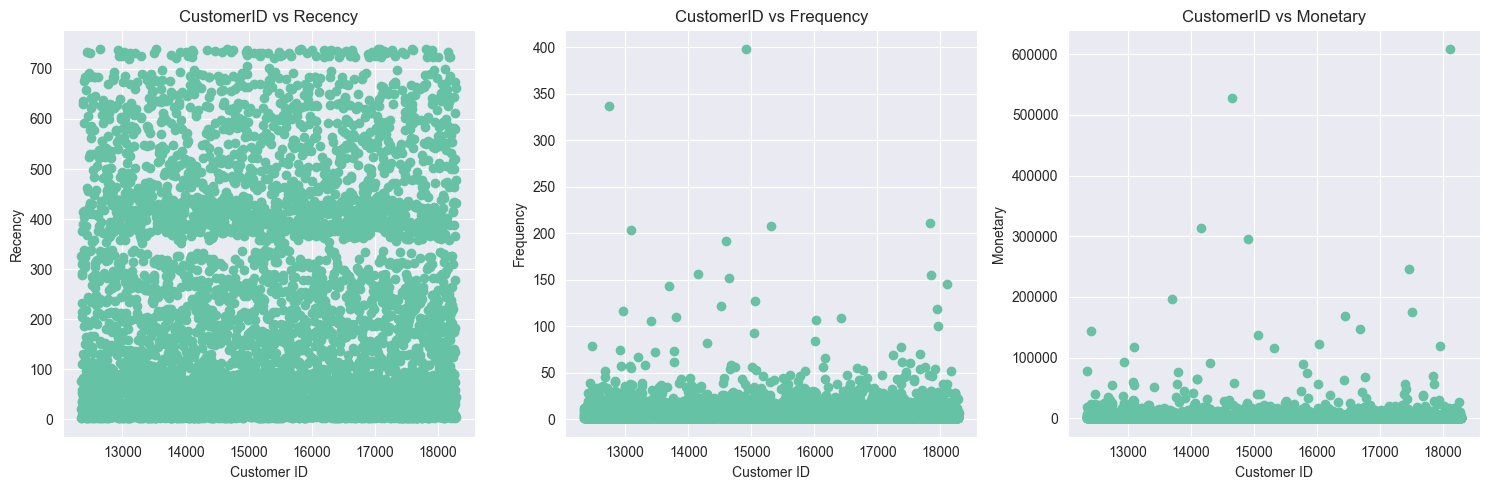

In [344]:
import matplotlib.pyplot as plt

# Assuming dataset is your DataFrame containing the dataset
# If dataset is not defined, define it using your actual dataset

plt.figure(figsize=(15, 5))

# Define the features and titles
features = ['Recency', 'Frequency', 'Monetary']
titles = ['CustomerID vs Recency', 'CustomerID vs Frequency', 'CustomerID vs Monetary']

# Plot the scatter plots
for i, feature in enumerate(features, start=1):
    plt.subplot(1, 3, i)
    plt.scatter(rfm['Customer ID'], rfm[feature])
    plt.xlabel('Customer ID')
    plt.ylabel(feature)
    plt.title(titles[i - 1])

plt.tight_layout()
plt.show()


In [345]:
rfm.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Customer ID,5881.00000,15314.67421,1715.42976,12346.00000,12405.80000,12641.00000,12937.00000,13833.00000,15313.00000,16797.00000,17696.00000,17992.00000,18228.20000,18287.00000
Recency,5881.00000,202.45775,209.47413,2.00000,2.00000,5.00000,10.00000,27.00000,97.00000,381.00000,537.00000,627.00000,727.00000,740.00000
Frequency,5881.00000,6.28720,13.01288,1.00000,1.00000,1.00000,1.00000,1.00000,3.00000,7.00000,13.00000,21.00000,46.00000,398.00000
Monetary,5881.00000,3007.21997,14728.32221,0.00000,45.01400,112.34000,161.67000,344.75000,886.57000,2297.66000,5554.89000,9502.26000,29687.31800,608821.65000


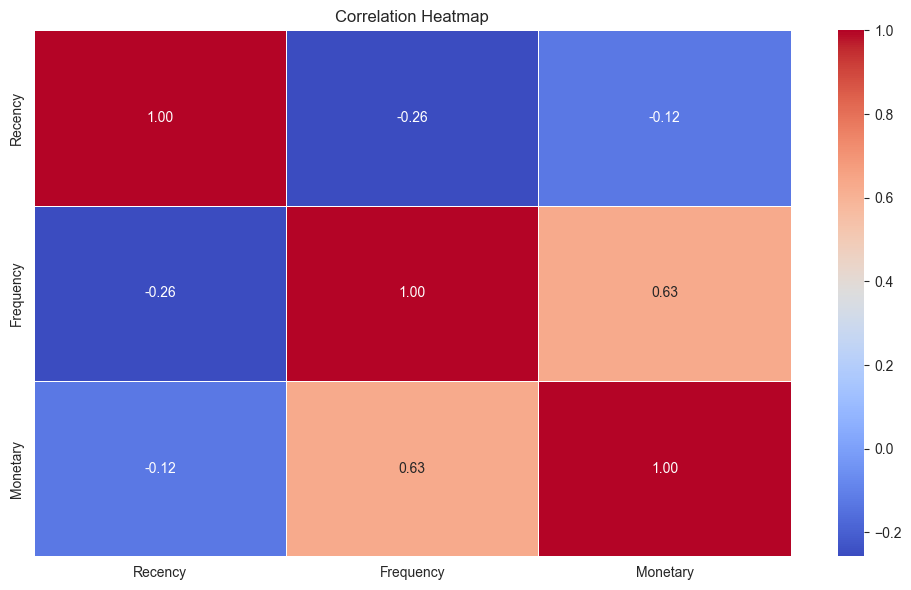

In [346]:
import seaborn as sns 
corr_matrix = rfm.drop(columns=['Customer ID']).corr(method='pearson')
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<Axes: title={'center': 'Frequency Vs. Recency'}, xlabel='Frequency', ylabel='Recency'>

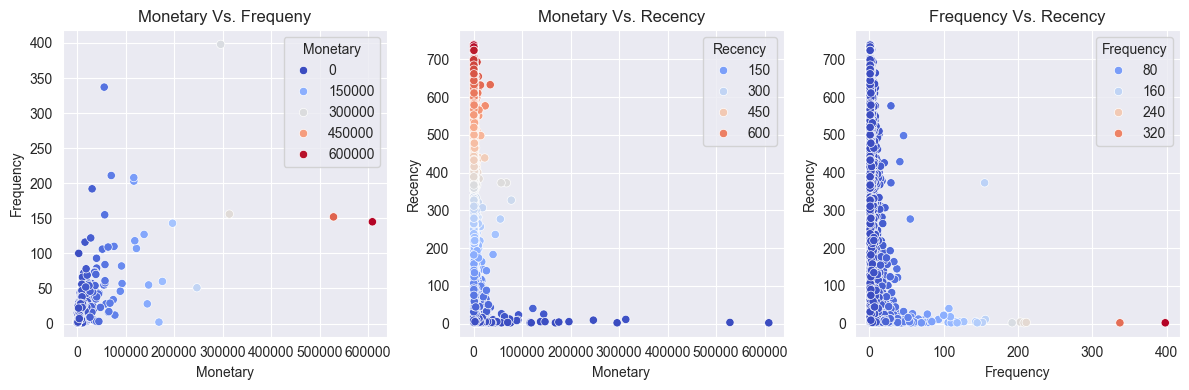

In [347]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Monetary Vs. Frequeny")
sns.scatterplot(x="Monetary", y="Frequency", hue="Monetary", data=rfm, palette="coolwarm")


plt.subplot(1, 3, 2)
plt.title("Monetary Vs. Recency")
sns.scatterplot(x="Monetary", y="Recency",  hue="Recency", data=rfm, palette="coolwarm")

plt.subplot(1, 3, 3)
plt.title("Frequency Vs. Recency")
sns.scatterplot(x="Frequency", y="Recency",  hue="Frequency", data=rfm, palette="coolwarm")

In [348]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  5881 non-null   float64
 1   Recency      5881 non-null   int64  
 2   Frequency    5881 non-null   int64  
 3   Monetary     5881 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 183.9 KB


In [349]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.00000,327,12,77556.46000
1,12347.00000,3,8,5633.32000
2,12348.00000,76,5,2019.40000
3,12349.00000,20,4,4428.69000
4,12350.00000,311,1,334.40000


In [350]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [351]:
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str))

rfm.head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
0,12346.00000,327,12,77556.46000,2,5,5,255
1,12347.00000,3,8,5633.32000,5,4,5,545
2,12348.00000,76,5,2019.40000,3,4,4,344
3,12349.00000,20,4,4428.69000,5,3,5,535
4,12350.00000,311,1,334.40000,2,1,2,212


In [352]:
rfm[rfm['RFM_SCORE'] == "555"].head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
16,12362.00000,4,11,5356.23000,5,5,5,555
48,12395.00000,20,15,5067.27000,5,5,5,555
70,12417.00000,4,20,6797.41000,5,5,5,555
86,12433.00000,2,10,20581.26000,5,5,5,555
90,12437.00000,3,39,12683.40000,5,5,5,555


In [353]:
# Ensure the score columns are numeric
rfm['MonetaryScore'] = pd.to_numeric(rfm['MonetaryScore'], errors='coerce')
rfm['RecencyScore'] = pd.to_numeric(rfm['RecencyScore'], errors='coerce')
rfm['FrequencyScore'] = pd.to_numeric(rfm['FrequencyScore'], errors='coerce')


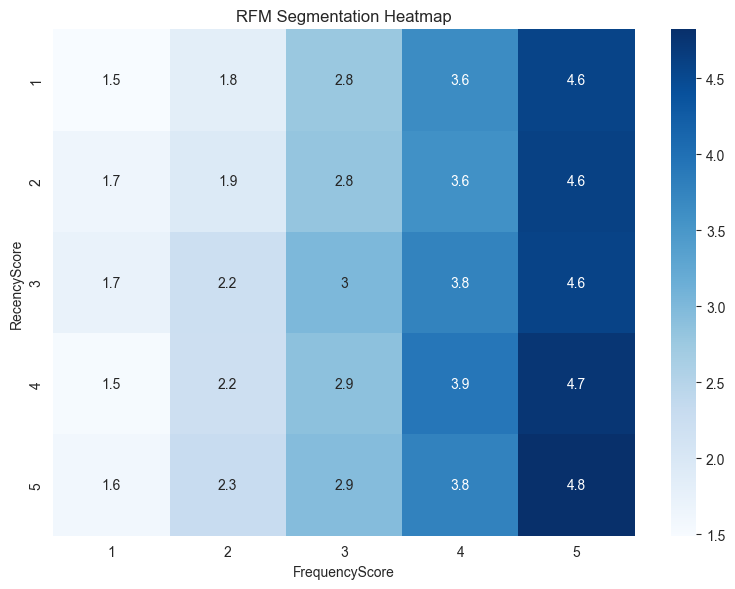

In [354]:
import seaborn as sns
import matplotlib.pyplot as plt

rfm_heatmap = rfm.pivot_table(
    index="RecencyScore", 
    columns="FrequencyScore", 
    values="MonetaryScore", 
    aggfunc="mean"
)

plt.figure(figsize=(8,6))
sns.heatmap(rfm_heatmap, annot=True, cmap="Blues")
plt.title("RFM Segmentation Heatmap")
plt.show()


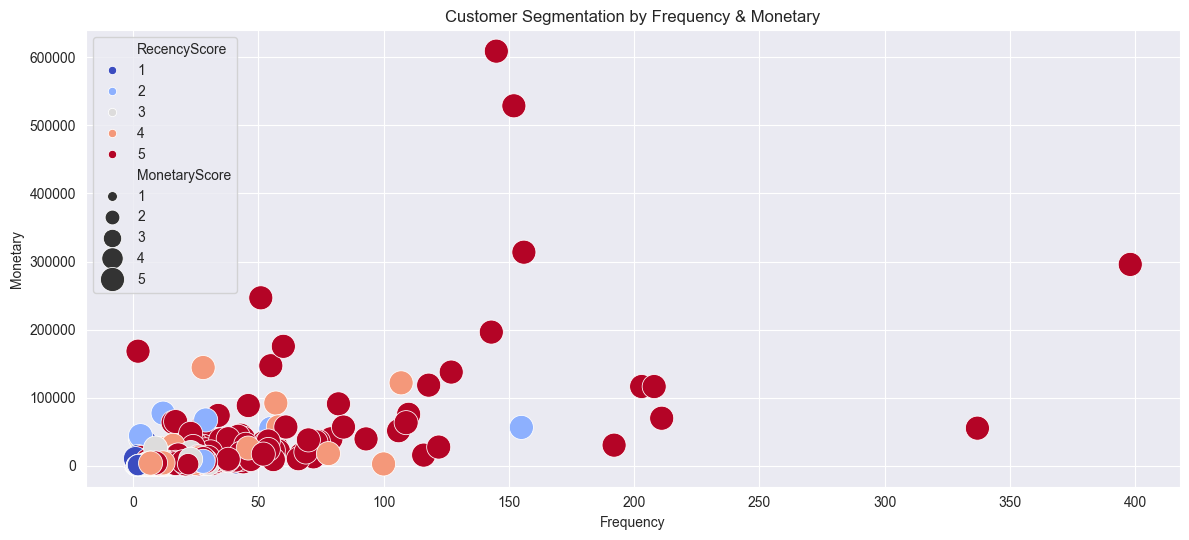

In [355]:
sns.scatterplot(
    x="Frequency", y="Monetary", 
    hue="RecencyScore", size="MonetaryScore",
    data=rfm, palette="coolwarm", sizes=(50, 300)
)
plt.title("Customer Segmentation by Frequency & Monetary")
plt.show()


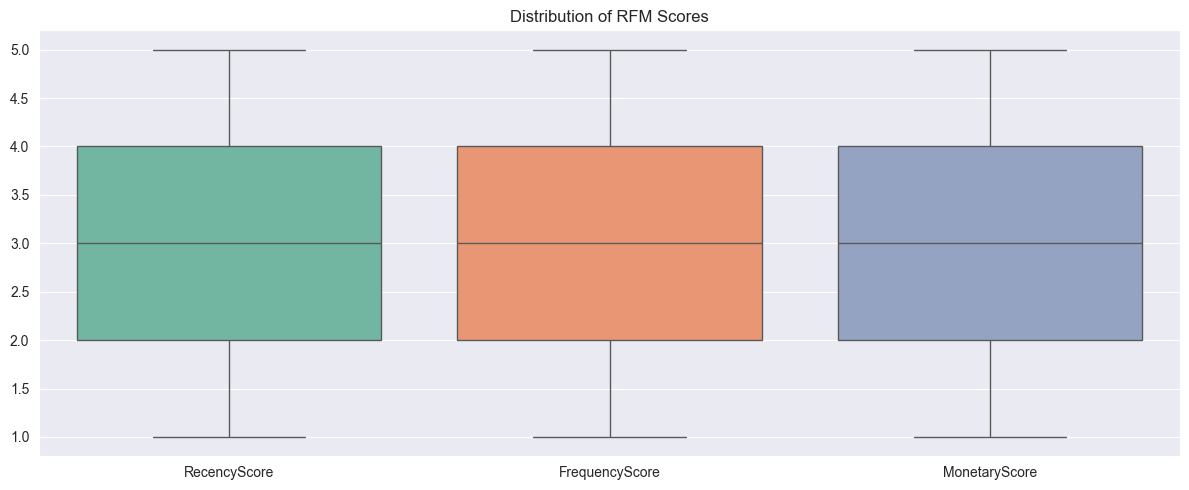

In [356]:
plt.figure(figsize=(12,5))
sns.boxplot(data=rfm[['RecencyScore','FrequencyScore','MonetaryScore']])
plt.title("Distribution of RFM Scores")
plt.show()


In [357]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}

In [358]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm.head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
0,12346.00000,327,12,77556.46000,2,5,5,255,25
1,12347.00000,3,8,5633.32000,5,4,5,545,54
2,12348.00000,76,5,2019.40000,3,4,4,344,34
3,12349.00000,20,4,4428.69000,5,3,5,535,53
4,12350.00000,311,1,334.40000,2,1,2,212,21


In [359]:
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
0,12346.00000,327,12,77556.46000,2,5,5,255,Cant_Loose
1,12347.00000,3,8,5633.32000,5,4,5,545,Champions
2,12348.00000,76,5,2019.40000,3,4,4,344,Loyal_Customers
3,12349.00000,20,4,4428.69000,5,3,5,535,Potential_Loyalists
4,12350.00000,311,1,334.40000,2,1,2,212,Hibernating


In [360]:
rfm['Segment'].value_counts()

Segment
Hibernating            1525
Loyal_Customers        1161
Champions               837
At_Risk                 753
Potential_Loyalists     714
About_to_Sleep          384
Need_Attention          267
Promising               114
Cant_Loose               71
New_Customers            55
Name: count, dtype: int64

In [361]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])

Recency       Frequency          Monetary      
                         mean count      mean count        mean count
Segment                                                              
About_to_Sleep      107.97656   384   1.35938   384   532.98639   384
At_Risk             373.67198   753   3.90438   753  1375.75028   753
Cant_Loose          332.22535    71  15.92958    71  8327.81552    71
Champions             9.56033   837  19.34170   837 10873.31177   837
Hibernating         460.55082  1525   1.25246  1525   435.42767  1525
Loyal_Customers      68.06891  1161   9.83893  1161  4195.98500  1161
Need_Attention      114.52060   267   3.14981   267  1276.65592   267
New_Customers        11.56364    55   1.00000    55   353.20582    55
Potential_Loyalists  26.75630   714   2.59104   714  1149.14637   714
Promising            39.83333   114   1.00000   114   318.13421   114

In [362]:
rfm[rfm["Segment"] == "Need_Attention"].head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
26,12372.00000,73,3,1298.04000,3,3,4,334,Need_Attention
33,12379.00000,83,4,1620.22000,3,3,4,334,Need_Attention
66,12413.00000,68,4,999.45000,3,3,3,333,Need_Attention
71,12418.00000,114,4,2021.20000,3,3,4,334,Need_Attention
77,12424.00000,164,4,3340.03000,3,3,5,335,Need_Attention


In [363]:
marketing_df = rfm[rfm["Segment"] == "Cant_Loose"][["Customer ID", "RFM_SCORE"]]
marketing_df.head()

,Customer ID,RFM_SCORE
0,12346.00000,255
135,12482.00000,155
407,12755.00000,255
487,12835.00000,155
524,12872.00000,255


In [364]:
marketing_df.head()

,Customer ID,RFM_SCORE
0,12346.00000,255
135,12482.00000,155
407,12755.00000,255
487,12835.00000,155
524,12872.00000,255


## Learning Based Clustering Using K Means and Hierarchical - Average and Complete

In [365]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = rfm[["Recency", "Frequency", "Monetary"]]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

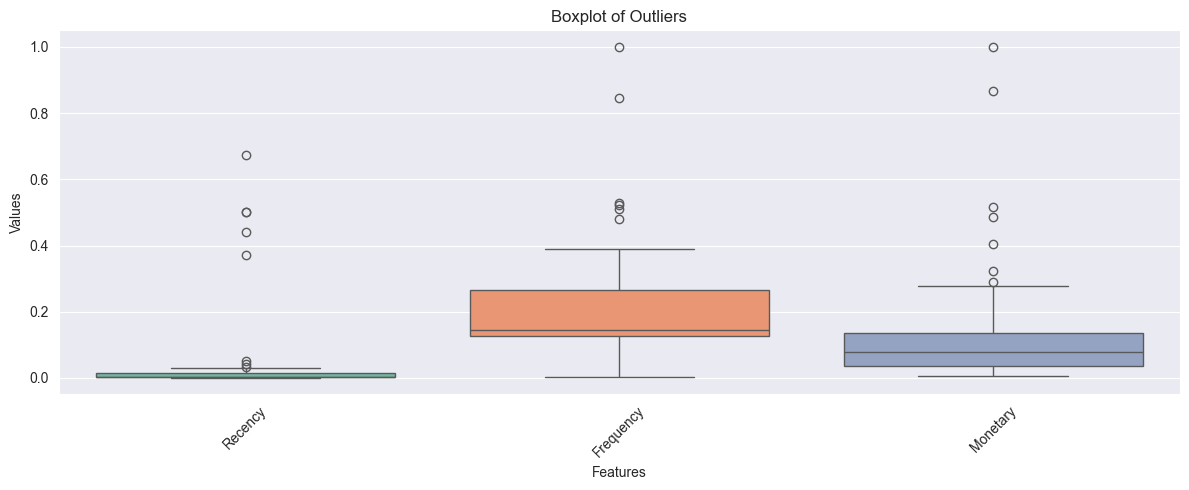

Outlier rows: 71


In [366]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore


# 1. Normalize dataset using MinMaxScaler
scaler = MinMaxScaler()
dataset_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# 2. Find outliers using scipy z score
z_scores = zscore(dataset_normalized)

# Define threshold for identifying outliers (e.g., Z-score > 3 or < -3)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

# 3. Visualize outliers using box plot
plt.figure(figsize=(12, 5))
sns.boxplot(data=dataset_normalized[outliers.any(axis=1)])
plt.title('Boxplot of Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# 4. Remove outliers and update the dataset
dataset_cleaned = dataset_normalized[~outliers.any(axis=1)]

print("Outlier rows:",features[outliers.any(axis=1)].shape[0])


# 5. Apply inverse_transform to inverse the normalization
dataset = pd.DataFrame(scaler.inverse_transform(dataset_cleaned), columns=dataset_cleaned.columns)


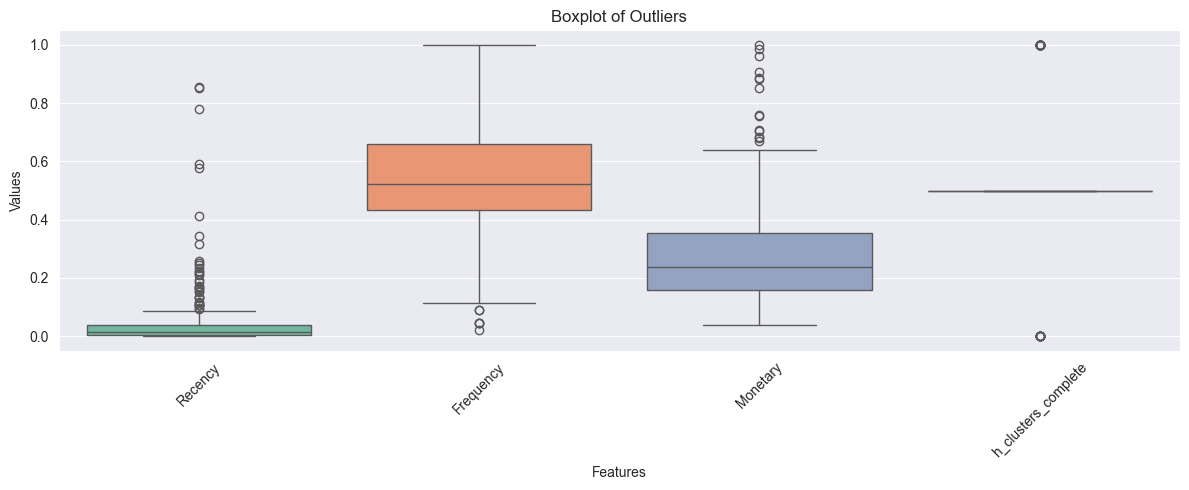

Outlier rows: 314


In [372]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore


# 1. Normalize dataset using MinMaxScaler
scaler = MinMaxScaler()
dataset_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 2. Find outliers using scipy z score
z_scores = zscore(dataset_normalized)

# Define threshold for identifying outliers (e.g., Z-score > 3 or < -3)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

# 3. Visualize outliers using box plot
plt.figure(figsize=(12, 5))
sns.boxplot(data=dataset_normalized[outliers.any(axis=1)])
plt.title('Boxplot of Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# 4. Remove outliers and update the dataset
dataset_cleaned = dataset_normalized[~outliers.any(axis=1)]

print("Outlier rows:",X[outliers.any(axis=1)].shape[0])


# 5. Apply inverse_transform to inverse the normalization
dataset = pd.DataFrame(scaler.inverse_transform(dataset_cleaned), columns=dataset_cleaned.columns)


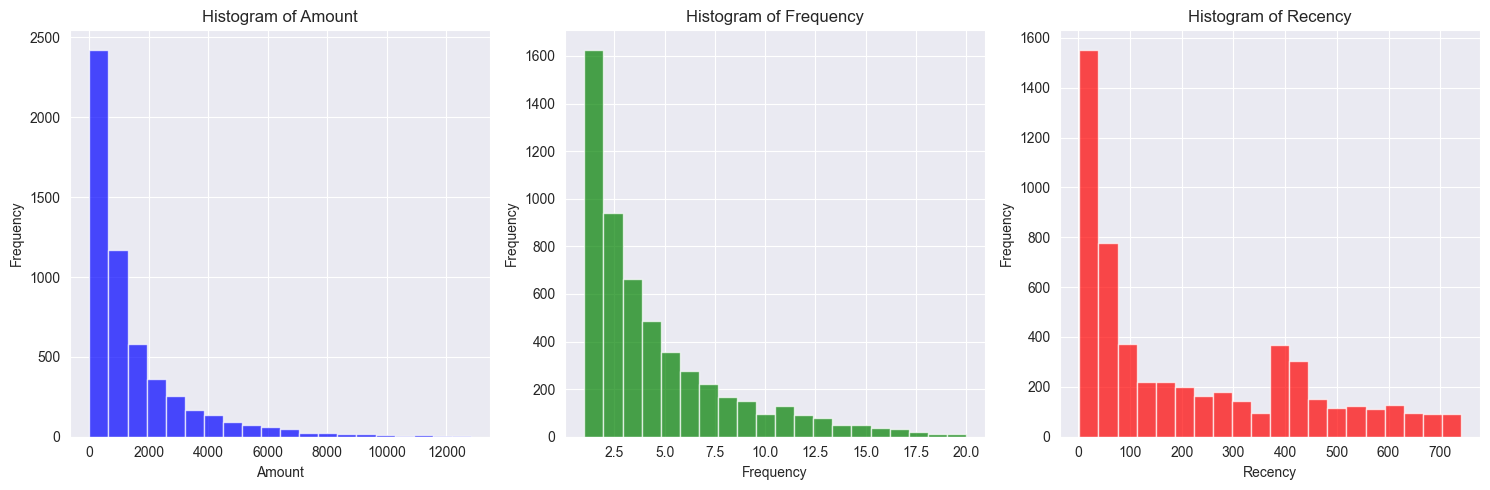

In [373]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dataset is your DataFrame containing the features Amount, Frequency, and Recency

# Plot histogram for each feature
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histogram for Amount
axes[0].hist(dataset['Monetary'], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Histogram of Amount')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequency')

# Plot histogram for Frequency
axes[1].hist(dataset['Frequency'], bins=20, color='green', alpha=0.7)
axes[1].set_title('Histogram of Frequency')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Frequency')

# Plot histogram for Recency
axes[2].hist(dataset['Recency'], bins=20, color='red', alpha=0.7)
axes[2].set_title('Histogram of Recency')
axes[2].set_xlabel('Recency')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


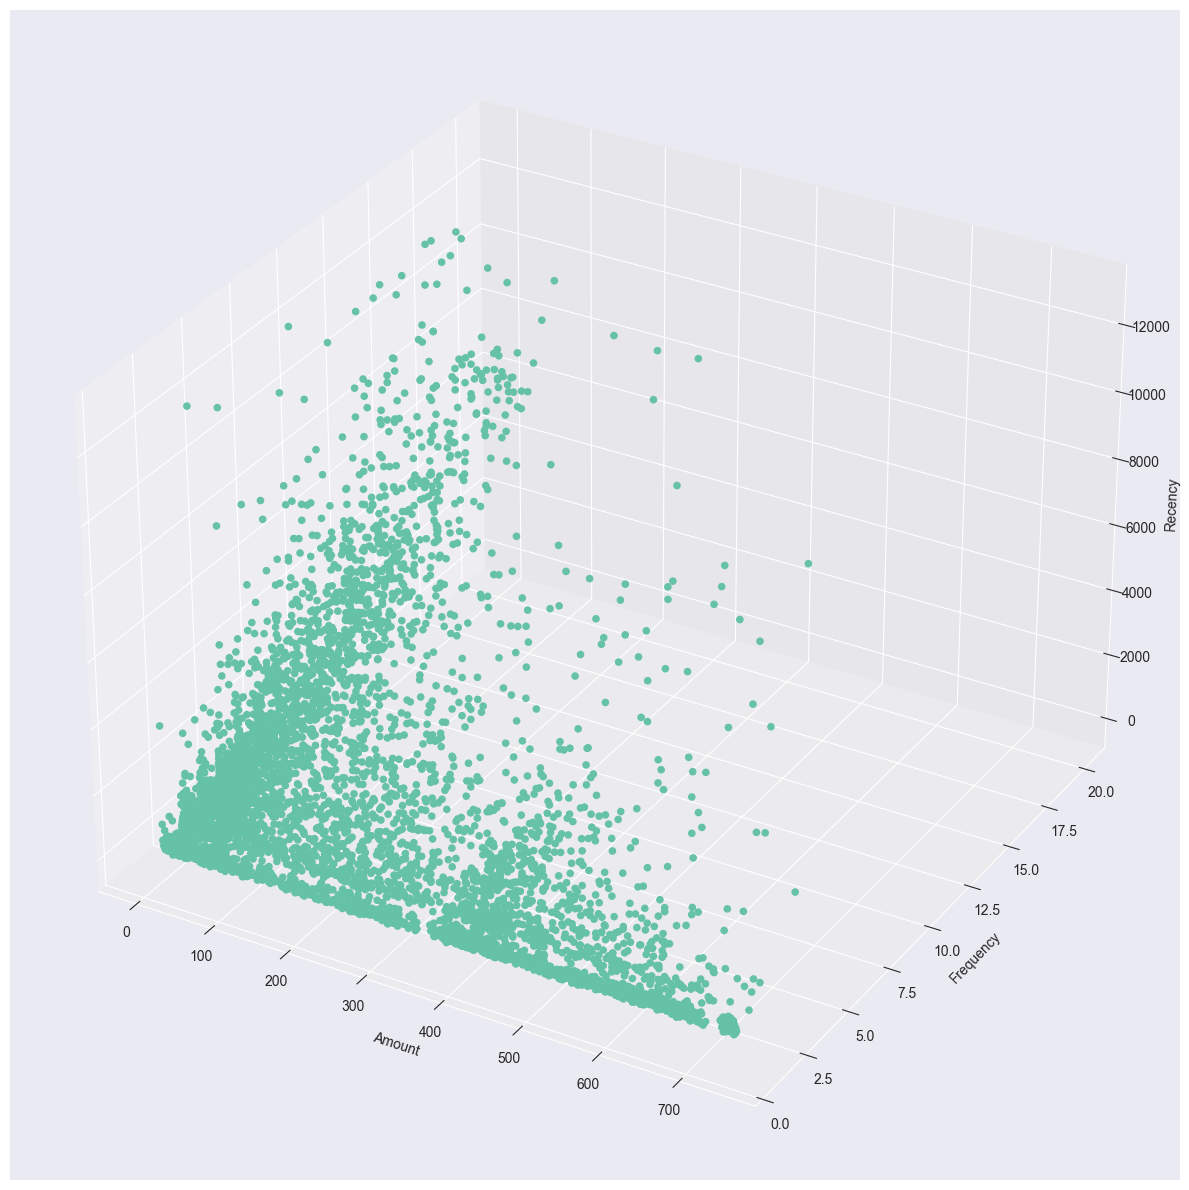

In [374]:
plt.rcParams["figure.figsize"] = [12.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], dataset.iloc[:, 2],alpha=1)
ax.set_xlabel('Amount')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.show()


In [403]:
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)
dataset_scaled.shape

(5496, 5)

In [404]:
variations = []
range_n_clusters = range(1,15)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dataset_scaled)
    variations.append(kmeans.inertia_)

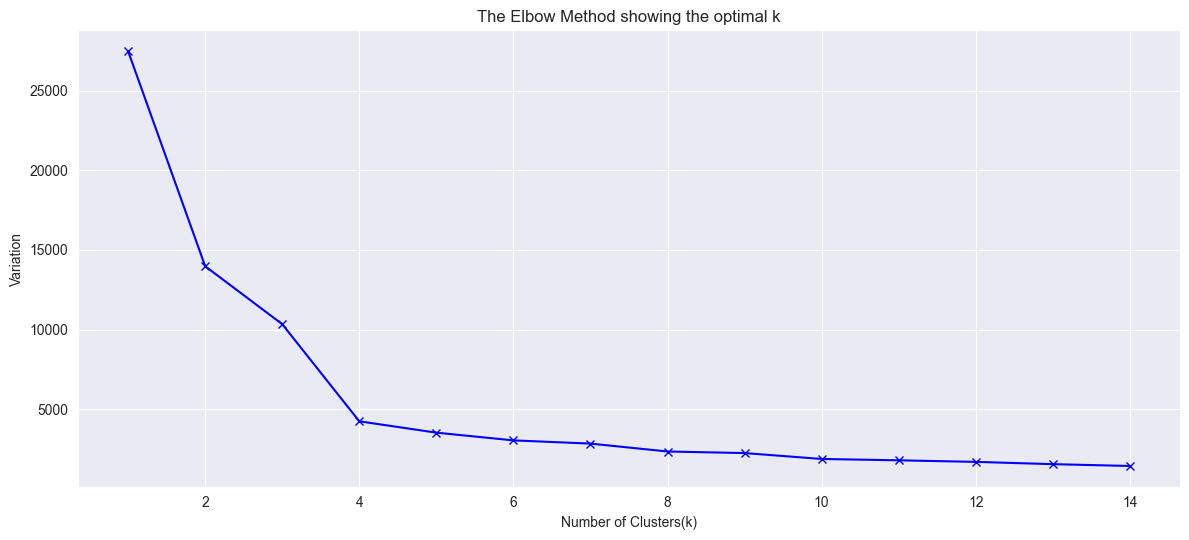

In [405]:
plt.plot(range_n_clusters, variations, 'bx-')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Variation')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
%matplotlib inline

In [412]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(dataset_scaled)
print(kmeans)

KMeans(max_iter=50, n_clusters=4)


In [427]:
centroids = kmeans.cluster_centers_

In [428]:
centroids

array([[ 1.25758894, -0.58684823, -0.49435798, -0.14423029, -0.52400626],
       [-0.57480583, -0.30945653, -0.3292914 , -0.14423029, -0.52400626],
       [-0.72424254,  1.50157313,  1.15692636, -0.14423029,  1.90837415],
       [-0.61619081,  2.03463136,  4.27776999,  6.93335623,  1.90837415]])

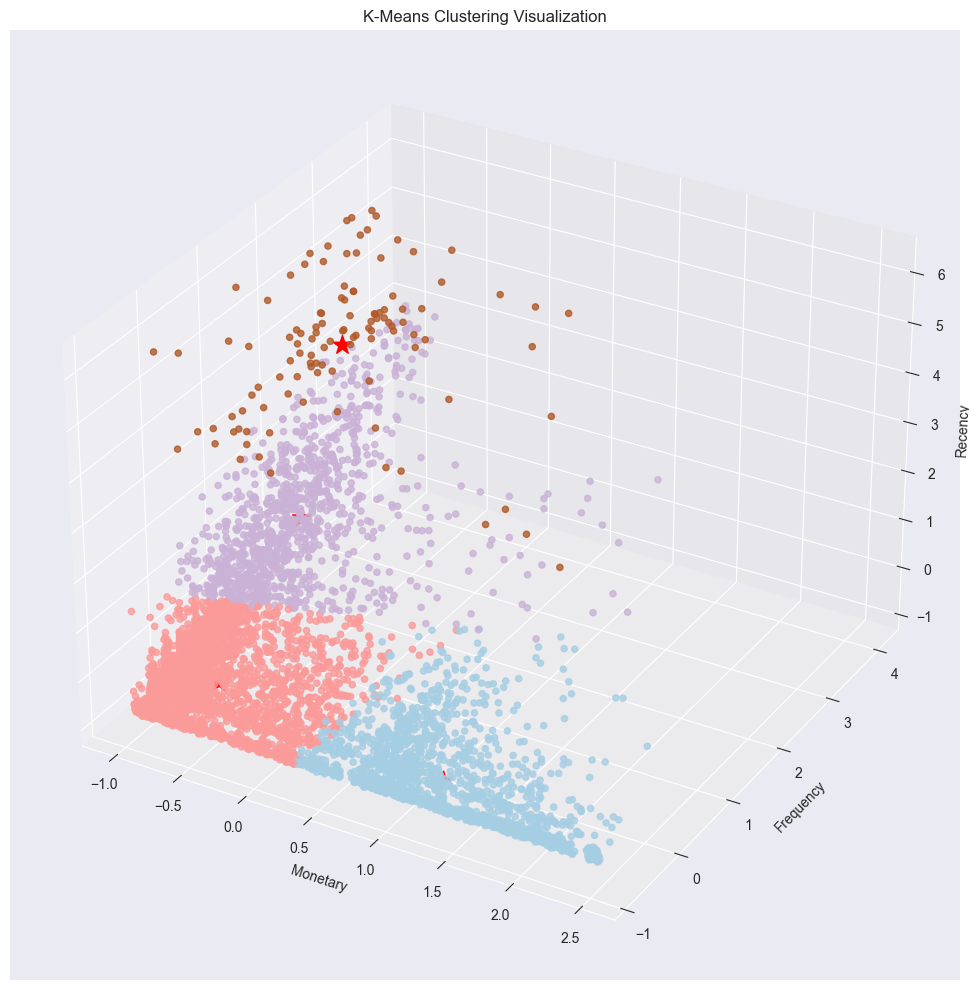

In [413]:

plt.rcParams["figure.figsize"] = [12.00, 5.50]
plt.rcParams["figure.autolayout"] = True
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset_scaled[:, 0], dataset_scaled[:, 1], dataset_scaled[:, 2], c=kmeans.labels_, alpha=0.8, cmap='Paired')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, alpha=1)
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.title('K-Means Clustering Visualization')
plt.show()



In [414]:
kmeans.labels_

array([2, 1, 2, ..., 0, 0, 2], shape=(5496,), dtype=int32)

In [415]:
dataset['km_clusters'] = kmeans.labels_

In [416]:
dataset['km_clusters'] = kmeans.labels_

In [422]:
# Convert Recency and Frequency to integers
dataset["Recency"] = dataset["Recency"].astype(int)
dataset["Frequency"] = dataset["Frequency"].astype(int)
dataset["Monetary"] = dataset["Monetary"].astype(int)

# Round Monetary to 2 decimals and remove .00 if not needed
# dataset["Monetary"] = dataset["Monetary"].map(lambda x: int(x) if x == int(x) else round(x, 1))


In [423]:
dataset

,Recency,Frequency,Monetary,h_clusters_complete,km_clusters
0,3,8,5633,0,2
1,76,5,2019,0,1
2,20,4,4428,0,2
3,311,1,334,0,0
4,376,1,300,0,0
...,...,...,...,...,...
5491,9,2,178,0,1
5492,433,1,461,0,0
5493,662,1,427,0,0
5494,478,2,1296,0,0


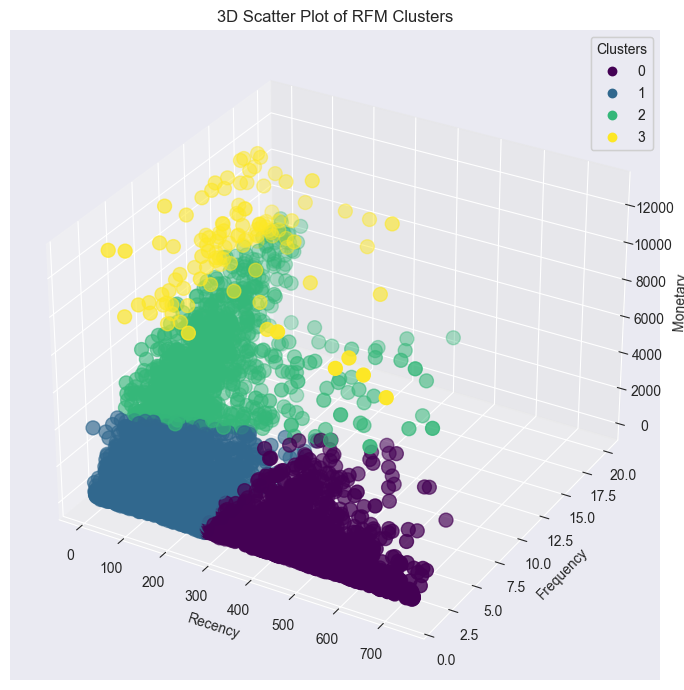

In [424]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster colors
scatter = ax.scatter(
    dataset['Recency'], 
    dataset['Frequency'], 
    dataset['Monetary'], 
    c=dataset['km_clusters'], 
    cmap='viridis', 
    s=100
)

# Labels
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D Scatter Plot of RFM Clusters')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [431]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

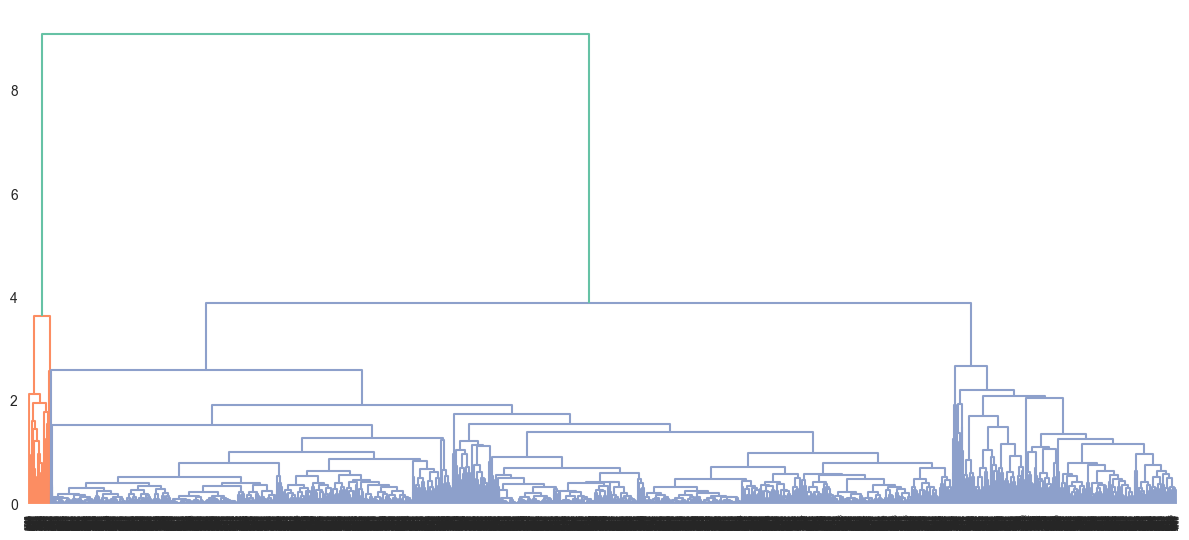

In [432]:
mergings = linkage(dataset_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [451]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 0, ..., 1, 1, 0], shape=(5496,))

In [454]:
dataset['h_clusters_average'] = cluster_labels
dataset.head()
# dataset.drop(columns=['km_clusters'], inplace=True)

,Recency,Frequency,Monetary,h_clusters_complete,km_clusters,h_clusters_average
0,3,8,5633,0,2,0
1,76,5,2019,1,1,1
2,20,4,4428,0,2,0
3,311,1,334,1,0,1
4,376,1,300,1,0,1


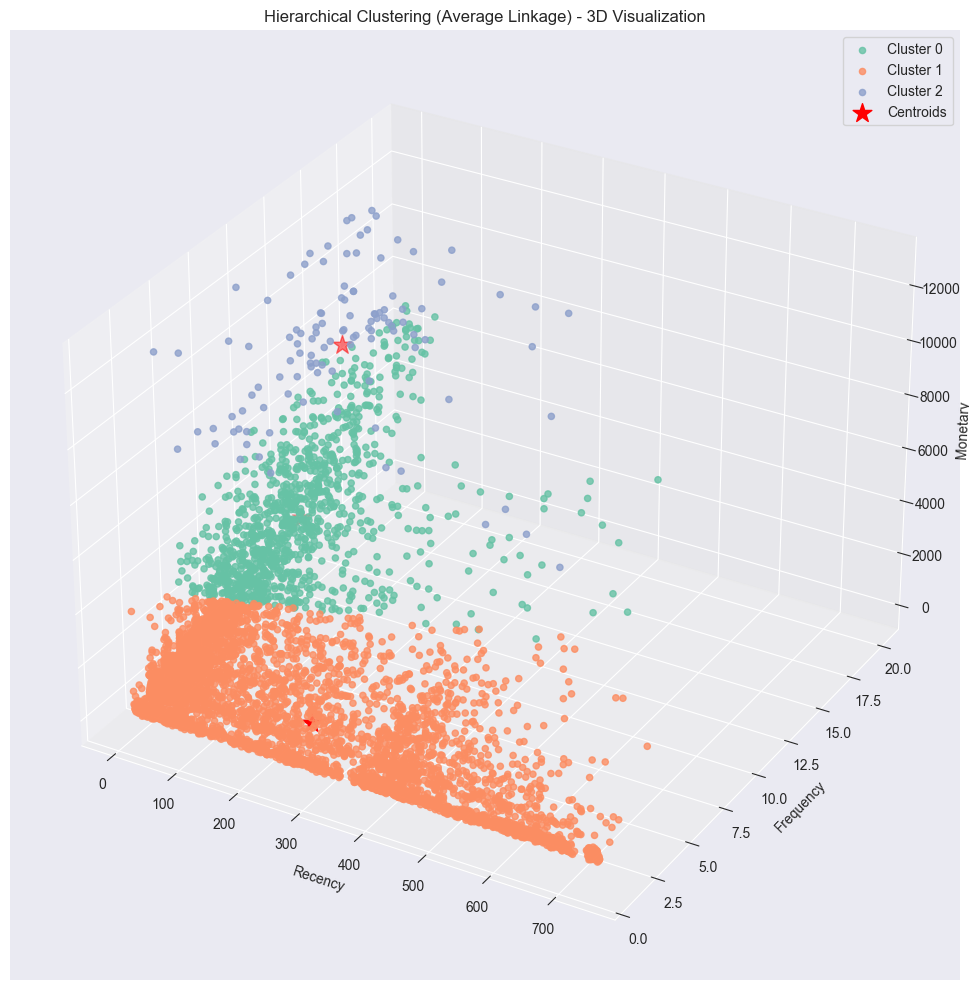

In [455]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


monetary = dataset['Monetary'].values
frequency = dataset['Frequency'].values
recency = dataset['Recency'].values

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot points per hierarchical cluster
for cluster in dataset['h_clusters_average'].unique():
    indices = dataset['h_clusters_average'] == cluster
    ax.scatter(
        recency[indices],
        frequency[indices],
        monetary[indices],
        label=f'Cluster {cluster}',
        alpha=0.8
    )

# Calculate centroids per cluster
centroids = dataset.groupby('h_clusters_average')[['Recency', 'Frequency', 'Monetary']].mean()

# Plot centroids
ax.scatter(
    centroids['Recency'],
    centroids['Frequency'],
    centroids['Monetary'],
    c='red',
    marker='*',
    s=200,
    label='Centroids'
)

# Labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('Hierarchical Clustering (Average Linkage) - 3D Visualization')

# Legend
ax.legend()
plt.show()




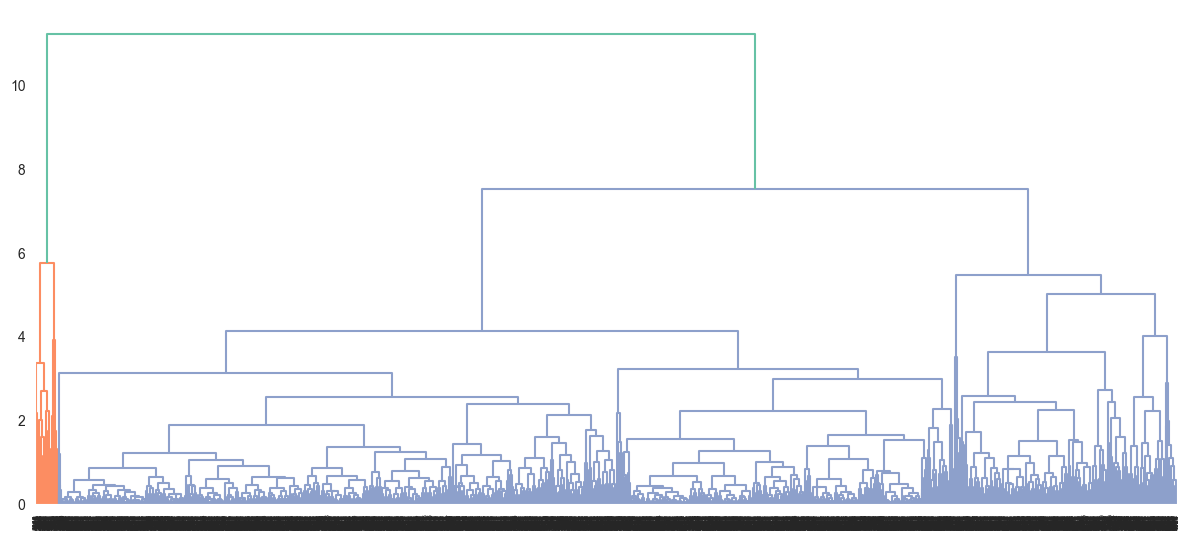

In [446]:
mergings = linkage(dataset_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [447]:
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
dataset['h_clusters_complete'] = cluster_labels
dataset.drop(columns=['h_clusters_average'], inplace=True)
print(dataset.head())

   Recency  Frequency  Monetary  h_clusters_complete  km_clusters
0        3          8      5633                    0            2
1       76          5      2019                    1            1
2       20          4      4428                    0            2
3      311          1       334                    1            0
4      376          1       300                    1            0


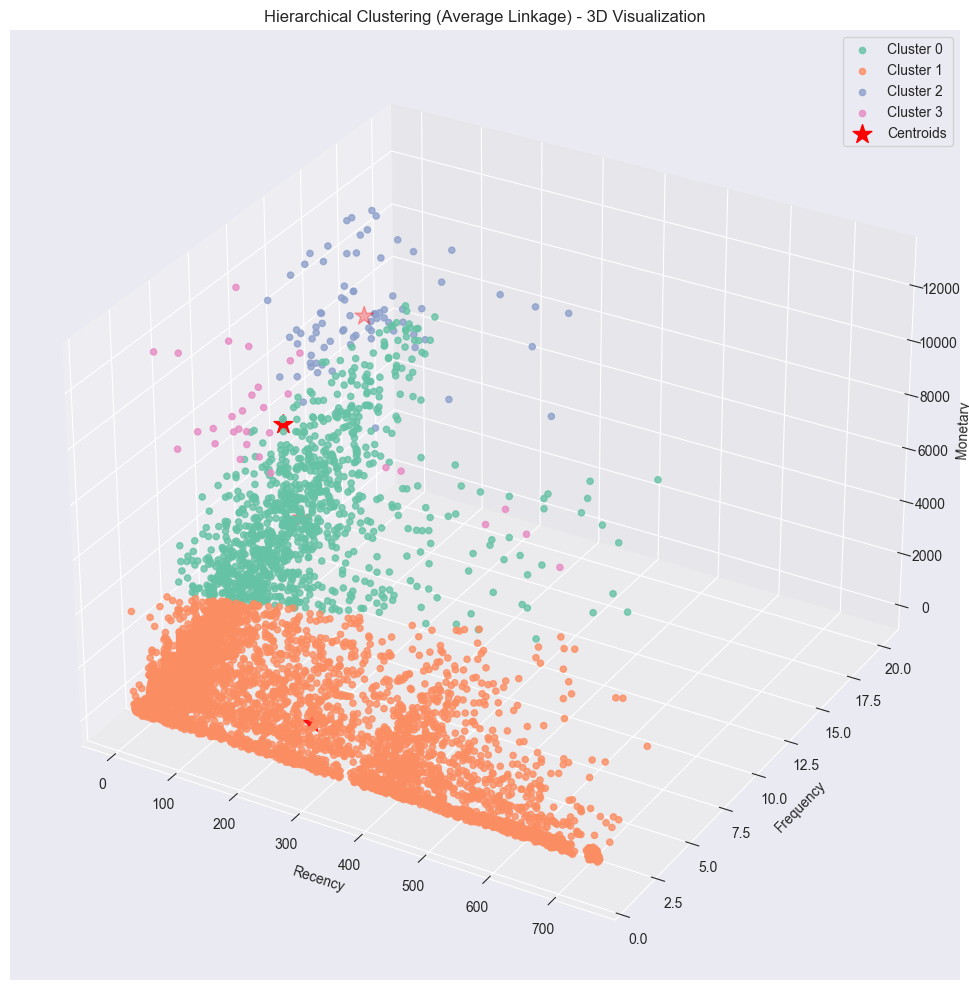

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


monetary = dataset['Monetary'].values
frequency = dataset['Frequency'].values
recency = dataset['Recency'].values

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot points per hierarchical cluster
for cluster in dataset['h_clusters_complete'].unique():
    indices = dataset['h_clusters_complete'] == cluster
    ax.scatter(
        recency[indices],
        frequency[indices],
        monetary[indices],
        label=f'Cluster {cluster}',
        alpha=0.8
    )

# Calculate centroids per cluster
centroids = dataset.groupby('h_clusters_complete')[['Recency', 'Frequency', 'Monetary']].mean()

# Plot centroids
ax.scatter(
    centroids['Recency'],
    centroids['Frequency'],
    centroids['Monetary'],
    c='red',
    marker='*',
    s=200,
    label='Centroids'
)

# Labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('Hierarchical Clustering (Complete Linkage) - 3D Visualization')

# Legend
ax.legend()
plt.show()



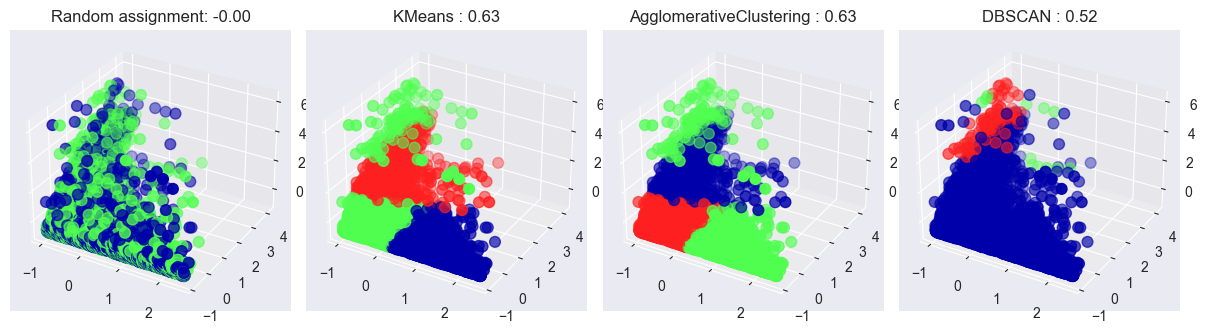

In [456]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import DBSCAN
import mglearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns 



X = dataset

# # Define the length of the array
length = len(X)

# # Generate a random array of integers between 0 and 2 with length equal to the number of samples
y = np.random.randint(2, size=length)

# # Rescale the data to zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Create a figure with 4 subplots
plt.rcParams["figure.figsize"] = [12.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(1, 4,subplot_kw={'projection': '3d'})

# Make a list of algorithms to use
algorithms = [KMeans(n_clusters=4), AgglomerativeClustering(n_clusters=optimal_num_clusters), DBSCAN(eps=0.5,min_samples=3)]

# Create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=length)

# Plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

# Iterate over each algorithm and plot its clusters
for ax, algorithm in zip(axes[1:], algorithms):
    # Fit the algorithm and predict clusters
    clusters = algorithm.fit_predict(X_scaled)
    
    # Plot the clusters in 3D
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=clusters,
                cmap=mglearn.cm3, s=60)
    
    # Set title with algorithm name and ARI score
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))
plt.show()

